# Exercici 1
## Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

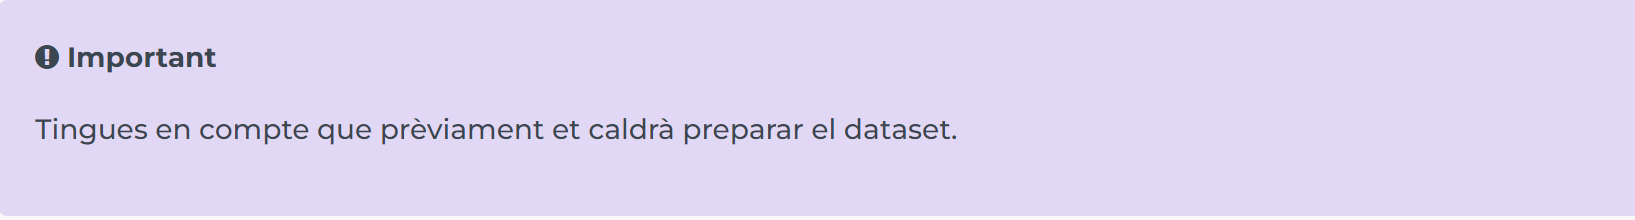

In [1]:
# Generic
import pandas as pd
import numpy as np

# Metodo de Normalización
from sklearn.preprocessing import RobustScaler

# Princial components analysis (PCA)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('C:/Users/alpid/Downloads/Publicacions Facebook Thailandia.csv', sep=",")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### 1.1 Preproceso: analisis y limpieza de datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
data.shape

(7050, 16)

In [5]:
data.isna().all()  # Aunque en el daata.info() ya se ve, verifico si hay columnas sin valores y las elimino

status_id           False
status_type         False
status_published    False
num_reactions       False
num_comments        False
num_shares          False
num_likes           False
num_loves           False
num_wows            False
num_hahas           False
num_sads            False
num_angrys          False
Column1              True
Column2              True
Column3              True
Column4              True
dtype: bool

In [6]:
data = data.dropna(axis=1, how="all")

In [7]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [8]:
data.shape

(7050, 12)

In [9]:
# Elimino filas duplicadas en el DataFrame
data = data.drop_duplicates()

In [10]:
data.shape

(6999, 12)

A considerar:
- La columna de **status_id** no me aporta informacion así que la eliminaré.  
- La columna de **status_published** me aporta información que pudiera ser relevante para el clustering pero desgraciadamente K-mean no trabaja bien con fechas ni horas porque aunque las haya descompuesto en componentes numéricos, el algoritmo se basa en la distancia euclidiana y puede no ser apropiado para datos de fecha y hora, y menos si tengo que escalar las características numéricas, arriesgandome a tener reultados absurdos.  
Así que también la eliminaré.  
- Con la columna de **status_type** que distingue si es video, photo, etc,... tengo dos opciones para manejarla:  
(1) codificarlas con label Encoder  
(2) convertir cada tipo en columnas dummies de 0 o 1.  
En este caso, Label Encoder no es apropiado porque no se trata de categorias con un orden o una jeraquía implícita, y aunque añadir columnas incrementa el número de características, no hay tantas columnas y he elminiado ya algunas, así que crearé las dummies, por si son relevantes para las agrupaciones.


In [11]:
data = data.drop(["status_id", "status_published"], axis=1)

In [12]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [13]:
data.shape

(6999, 10)

In [14]:
data = pd.get_dummies(data, columns=['status_type'])
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,0,1,0,0
2,227,236,57,204,21,1,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,0,1,0,0
4,213,0,0,204,9,0,0,0,0,0,1,0,0


In [15]:
data.shape

(6999, 13)

Verificaré de forma gráffica si hay outliers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'num_reactions'),
  Text(1, 0, 'num_comments'),
  Text(2, 0, 'num_shares'),
  Text(3, 0, 'num_likes'),
  Text(4, 0, 'num_loves'),
  Text(5, 0, 'num_wows'),
  Text(6, 0, 'num_hahas'),
  Text(7, 0, 'num_sads'),
  Text(8, 0, 'num_angrys'),
  Text(9, 0, 'status_type_link'),
  Text(10, 0, 'status_type_photo'),
  Text(11, 0, 'status_type_status'),
  Text(12, 0, 'status_type_video')])

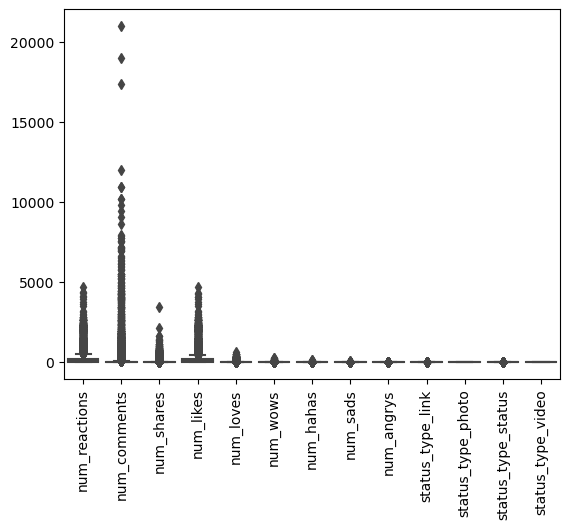

In [16]:
sns.boxplot(data)
plt.xticks(rotation='vertical')

Veo que hay un elevado numero de outliers pero, salvo en el caso de los outliers de Num_commnets que claramente estan distanciados de la gran mayoria de resutaldos, el resto no parecen estar tan lejos de sus congeneres, por eso tengo mis dudas de que no sean relevantes para el analisis así que los dejo y procedo a la normalización.  
  
Dado que los outliers peuden ser relevantes voy a usar como método de normalización el RobustScaler que es menos sensible a estos.

### 1.2 Preproceso: Normalización

In [17]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(data)
df = pd.DataFrame(data_scaled, columns = data.columns)
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0.0,-1.0,0.0,1.0
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,0.839169,10.070549,10.064652,0.926950,4.250512,1.252893,0.697957,0.232605,0.110159,0.009001,-0.393628,0.051293,0.333333
std,2.275783,40.579228,33.011726,2.663941,13.368957,8.725551,3.970912,1.481105,0.688582,0.094454,0.488589,0.220611,0.471438
min,-0.291457,-0.181818,0.000000,-0.345455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.206030,-0.181818,0.000000,-0.242424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.793970,0.818182,1.000000,0.757576,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,23.376884,953.909091,856.000000,28.200000,219.000000,278.000000,157.000000,51.000000,31.000000,1.000000,0.000000,1.000000,1.000000


### 1.3 Preproceso: Princial components analysis (PCA)

Veamos si es posible reducir dimensiones en función de la influencia de cada variable.

In [19]:
pca = PCA().fit(df)

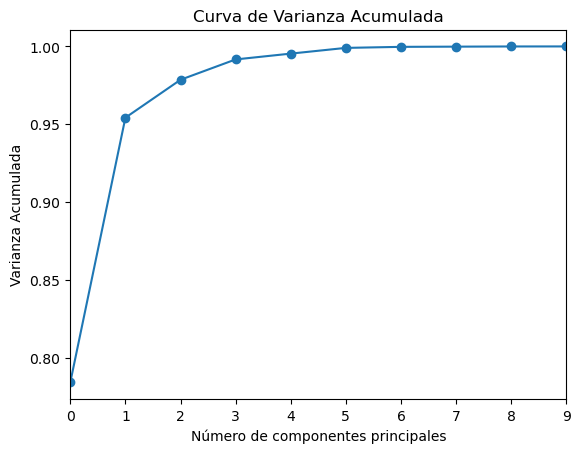

In [20]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = "o")
plt.xlim([0, 9])
plt.xlabel("Número de componentes principales")
plt.ylabel("Varianza Acumulada")
plt.title("Curva de Varianza Acumulada")
plt.show()

Vamos a ver cuantos componentes vamos a necesitar. Por el grafico vemos que esta entre 1 y 2 capturo mas del 97% de la varianza.

In [22]:
pca = PCA(.97).fit(df)
print('Número de componentes para conservar el 95% de la varianza es:', pca.n_components_)

Número de componentes para conservar el 95% de la varianza es: 3


# Exercici 2
## Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

# Exercici 3
## Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.